In [1]:
import os, re
import math
import numpy as np
import matplotlib.pyplot as plt
base_dir = "/Users/artijain/Documents/18-661_Intro_to_ML_Homeworks/homework3/hw3_data&code/hw3_data"

## 5.2 Feature Representation

### Loading in dic.dat

In [2]:
# Loading in the dictionary
with open(os.path.join(base_dir,"dic.dat"), 'r') as file:
    key_word_dictionary = [line.strip() for line in file]

In [3]:
X_train_ham_path = "train/ham"
X_train_spam_path = "train/spam"

In [4]:
X_train_ham = []
X_train_spam = []
y_train = []

### Bag of Words Function

In [5]:
def tokenize(message):
    delimiters = r'[ \t\n.,?]+'
    return re.split(delimiters, message)

def get_bag_of_words(message):
    """This function will take in a message and return a feature vector that conveys the count of each word"""
    x_i = [0] * len(key_word_dictionary)
    for token in tokenize(message):
        if token.lower() in key_word_dictionary:
            idx = key_word_dictionary.index(token)
            x_i[idx] = x_i[idx] + 1
    return x_i

### Creating the feature vectors for the training set

In [6]:
dir_path = os.path.join(base_dir, X_train_ham_path)

for file_name in os.listdir(dir_path):
    with open(os.path.join(dir_path, file_name), 'r', encoding='iso-8859-1') as file:
        message = file.read()
        x_i = get_bag_of_words(message)
        X_train_ham.append(x_i)

X_train_ham = np.array(X_train_ham)

In [7]:
dir_path = os.path.join(base_dir, X_train_spam_path)
for file_name in os.listdir(dir_path):
    with open(os.path.join(dir_path, file_name), 'r', encoding='iso-8859-1') as file:
        message = file.read()
        x_i = get_bag_of_words(message)
        X_train_spam.append(x_i)

X_train_spam = np.array(X_train_spam)
#X_train_spam = np.transpose(X_train_spam)

### Q5.2 Figure out which 3 words occur the most frequently

In [8]:
column_sums_ham = np.sum(X_train_ham, axis=0) # sums across all the columns of the X
column_sums_spam = np.sum(X_train_spam, axis=0) 

top_three_index_ham = column_sums_ham.argsort()[-3:][::-1] # sorts the indexes by increasing order and then picks the first 3
top_three_index_spam = column_sums_spam.argsort()[-3:][::-1]

# creating the y vector
y_train = [1] * X_train_ham.shape[0]
y_train = y_train + ([0] * X_train_spam.shape[0]) 
y_train = np.transpose(np.array(y_train))

# Combining the training sets and creating the y vector
X_train = np.concatenate((X_train_ham, X_train_spam), axis=0)
row_ham = X_train_ham.shape[0]
row_spam = X_train_spam.shape[0]

# Getting the top 3 words in total training set
column_sums_total = np.sum(X_train, axis=0) 
top_three_index_total = column_sums_total.argsort()[-3:][::-1]

In [9]:
top_tree_ham = {f"{key_word_dictionary[top_three_index_ham[0]]}":np.sum(X_train_ham[:, top_three_index_ham[0]]),
                f"{key_word_dictionary[top_three_index_ham[1]]}":np.sum(X_train_ham[:, top_three_index_ham[1]]),
                f"{key_word_dictionary[top_three_index_ham[2]]}":np.sum(X_train_ham[:, top_three_index_ham[2]]) }

top_tree_spam = {f"{key_word_dictionary[top_three_index_spam[0]]}":np.sum(X_train_spam[:, top_three_index_spam[0]]),
                f"{key_word_dictionary[top_three_index_spam[1]]}":np.sum(X_train_spam[:, top_three_index_spam[1]]),
                f"{key_word_dictionary[top_three_index_spam[2]]}":np.sum(X_train_spam[:, top_three_index_spam[2]]) }


top_tree_total = {f"{key_word_dictionary[top_three_index_total[0]]}":np.sum(X_train[:, top_three_index_total[0]]),
                f"{key_word_dictionary[top_three_index_total[1]]}":np.sum(X_train[:, top_three_index_total[1]]),
                f"{key_word_dictionary[top_three_index_total[2]]}":np.sum(X_train[:, top_three_index_total[2]]) }


print(f"For Ham Training Set:")
print("{("+ f"{key_word_dictionary[top_three_index_ham[0]]}: {top_tree_ham[key_word_dictionary[top_three_index_ham[0]]]}" + 
      "), ("+ f"{key_word_dictionary[top_three_index_ham[1]]}: {top_tree_ham[key_word_dictionary[top_three_index_ham[1]]]}"+ "), ("+ 
      f"{key_word_dictionary[top_three_index_ham[2]]}: {top_tree_ham[key_word_dictionary[top_three_index_ham[2]]]}" + ")}")
print("")

print(f"For Spam Training Set:")
print("{("+ f"{key_word_dictionary[top_three_index_spam[0]]}: {top_tree_spam[key_word_dictionary[top_three_index_spam[0]]]}" + 
      "), ("+ f"{key_word_dictionary[top_three_index_spam[1]]}: {top_tree_spam[key_word_dictionary[top_three_index_spam[1]]]}"+ "), ("+ 
      f"{key_word_dictionary[top_three_index_spam[2]]}: {top_tree_spam[key_word_dictionary[top_three_index_spam[2]]]}" + ")}")
print("")

print(f"For Total Training Set:")
print("{("+ f"{key_word_dictionary[top_three_index_total[0]]}: {top_tree_total[key_word_dictionary[top_three_index_total[0]]]}" + 
      "), ("+ f"{key_word_dictionary[top_three_index_total[1]]}: {top_tree_total[key_word_dictionary[top_three_index_total[1]]]}"+ "), ("+ 
      f"{key_word_dictionary[top_three_index_total[2]]}: {top_tree_total[key_word_dictionary[top_three_index_total[2]]]}" + ")}")
print("")

For Ham Training Set:
{(enron: 600), (will: 310), (deal: 287)}

For Spam Training Set:
{(price: 65), (http: 60), (more: 44)}

For Total Training Set:
{(enron: 600), (will: 351), (please: 291)}



## 5.3 Logistic Regression Implementation

#### Pseudocode

Starting with X which has all the features -> X is basically in X transpose form (the rows are for each message)
Y is a column with the output classes

1. add the column to ones to X
2. get do the dot product, bias stuff
3. apply the sigmoid function

** If the value of sigmoid is less than 1e−16, set it equal to 1e−16

4. calculate regularized cross entropy loss

In [10]:
def sigmoid(z):
    z = np.clip(z, -500,500)
    answer = 1/(1 + np.exp(-z))
    return float(answer)

In [11]:
def cross_entropy(X, w, y, b):
    """
    For each message (row), I want to calculate the cross entropy loss - I want to see the error between the classification of each message and the predicted value
    X = 1 x d
    w = d x 1 
    y = single value (correct class)
    b = single value (bias)
    """
    sigmoid_term = sigmoid(np.dot(w, X) + b)
    one_minus_sigmoid = 1 - sigmoid_term

    if sigmoid_term < 1e-16:
        sigmoid_term = 1e-16
    
    if one_minus_sigmoid < 1e-16:
        one_minus_sigmoid = 1e-16

    log_sigmoid = y * np.log(sigmoid_term)
    log_one_minus = (1-y) * np.log(one_minus_sigmoid)

    loss = log_sigmoid+log_one_minus
    
    return loss

In [12]:
def compute_gradient(X, w, y, b):
    """
    For each row, I am computing the gradient.
    X = 1 x d
    w = d x 1
    y = single number
    b = single number
    """
    sigmoid_term = sigmoid(np.dot(w, X) + b)
    
    if sigmoid_term < 1e-16:
        sigmoid_term = 1e-16

    gradient = (sigmoid_term - y)*X 
    return gradient

In [13]:
def compute_bias(X, w, y, b):
    sigmoid_term = sigmoid(np.dot(w, X) + b)
    if sigmoid_term < 1e-16:
        sigmoid_term = 1e-16

    return sigmoid_term - y

In [14]:
# without regularization
def do_gradient_descent(X_train, w, y_train, b, num_iter, learning_rate, reg=None):
    n,d = X_train.shape
    cross_entropy_losses = []
    
    for iteration in range(num_iter+1):
        total_loss = 0
        gradient_terms = []
        bias = []
        
        for row in range(n):
            total_loss += cross_entropy(X_train[row], w, y_train[row], b) # updating total loss
            gradient_terms.append(compute_gradient(X_train[row], w, y_train[row], b)) # appending gradient term
            bias.append(compute_bias(X_train[row], w, y_train[row], b))
      
        cross_entropy_losses.append(-total_loss) if reg is None else cross_entropy_losses.append(-total_loss + (reg * np.dot(w, w)))
        sum_of_gradient_terms = np.sum(gradient_terms, axis=0) if reg is None else sum(gradient_terms) + 2 * reg * w

        
        sum_of_bias = sum(bias)
        w = w - learning_rate * sum_of_gradient_terms
        b = b - learning_rate * sum_of_bias
    
    return cross_entropy_losses, w

### Q5.4b
For step sizes η = {0.001,0.01,0.05,0.1,0.5} and without regularization, implement batch gradient descent (using the whole training data for the gradient calculation).

In [15]:
n,d = X_train.shape
num_iter = 50

For learning rate: 0.001, the L2 norm of w is: 2.5900956006730875
For learning rate: 0.01, the L2 norm of w is: 7.743048678723452
For learning rate: 0.05, the L2 norm of w is: 26.178355231436786
For learning rate: 0.1, the L2 norm of w is: 50.72922685357117
For learning rate: 0.5, the L2 norm of w is: 250.65982308709482


Text(0.5, 1.0, 'Cross Entropy Loss at different learning rates WITHOUT Regularization')

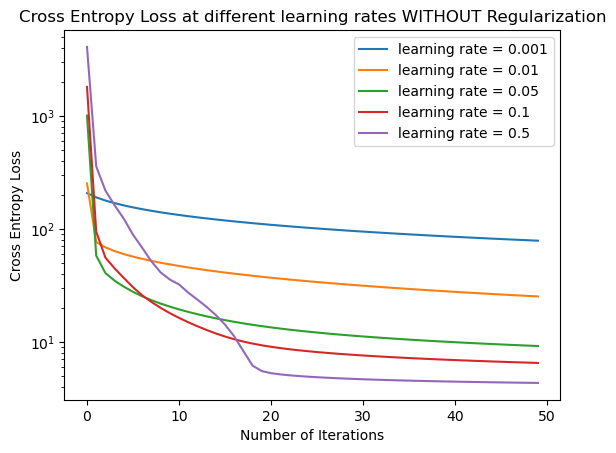

In [16]:
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.5]

for l in learning_rates:
    w = np.array([0] * d)
    w = w.T
    b = 0.1
    cross_entropies, w = do_gradient_descent(X_train, w, y_train, b, num_iter, l)

    l2_norm_of_w = math.sqrt(np.dot(w, w))
    print(f"For learning rate: {l}, the L2 norm of w is: {l2_norm_of_w}")
    
    plt.plot(cross_entropies[1:], label=f"learning rate = {l}")
    plt.show

plt.legend()
plt.yscale('log')
plt.xlabel("Number of Iterations") # use log scale
plt.ylabel("Cross Entropy Loss")
plt.title("Cross Entropy Loss at different learning rates WITHOUT Regularization")
   

### Q5.4c

Text(0.5, 1.0, 'Cross Entropy Loss at different learning rates WITH Regularization = 0.1')

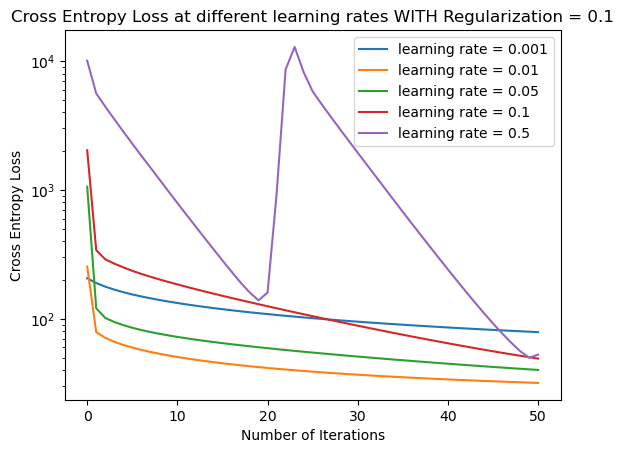

In [17]:
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.5]
reg_coeff = 0.1

for l in learning_rates:
    w = np.array([0] * d)
    w = w.T
    b = 0.1
    cross_entropies, w = do_gradient_descent(X_train, w, y_train, b, num_iter+1, l, reg_coeff)
    plt.plot(cross_entropies[1:], label=f"learning rate = {l}")
    plt.show

plt.legend()
plt.yscale('log')
plt.xlabel("Number of Iterations") # plot with log
plt.ylabel("Cross Entropy Loss")
plt.title("Cross Entropy Loss at different learning rates WITH Regularization = 0.1")

In [18]:
reg_coeff = [0, 0.1, 0.2, 0.3, 0.4, 0.5]

for reg in reg_coeff:
    w = np.array([0] * d)
    w = w.T
    b = 0.1
    cross_entropies, w = do_gradient_descent(X_train, w, y_train, b, num_iter+1, 0.01, reg)
    l2_norm_of_w = math.sqrt(np.dot(w, w))
    print(f"For reg coefficient: {reg}, the L2 norm of w is: {l2_norm_of_w}")

For reg coefficient: 0, the L2 norm of w is: 7.7806968958589895
For reg coefficient: 0.1, the L2 norm of w is: 7.309839813370413
For reg coefficient: 0.2, the L2 norm of w is: 6.890212277044478
For reg coefficient: 0.3, the L2 norm of w is: 6.516488830064934
For reg coefficient: 0.4, the L2 norm of w is: 6.183742814253457
For reg coefficient: 0.5, the L2 norm of w is: 5.887431320906623
